In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/AllCargo.xlsx'
df = pd.read_excel(path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 1696378.5490038348
R-squared: 0.7257156321730308
Overall MAPE: 18.50815779288426%
Overall MAE: 692.4786718061199


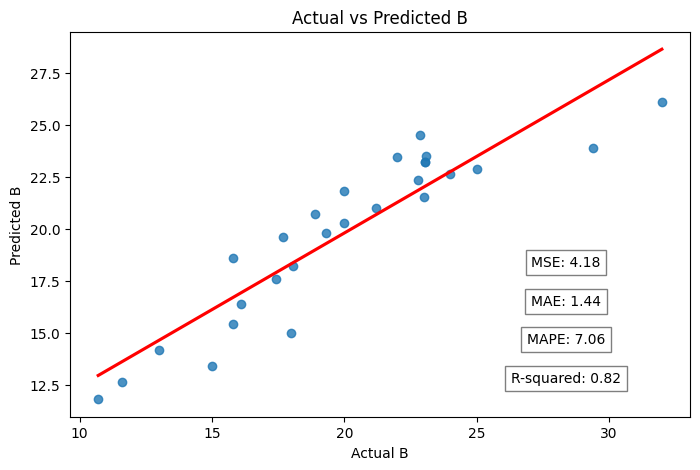

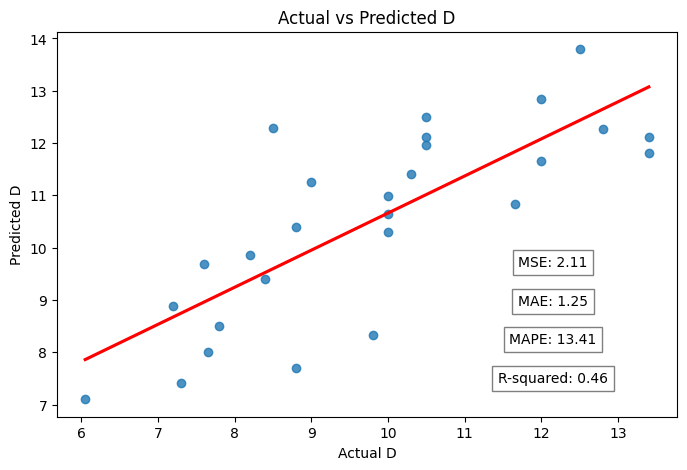

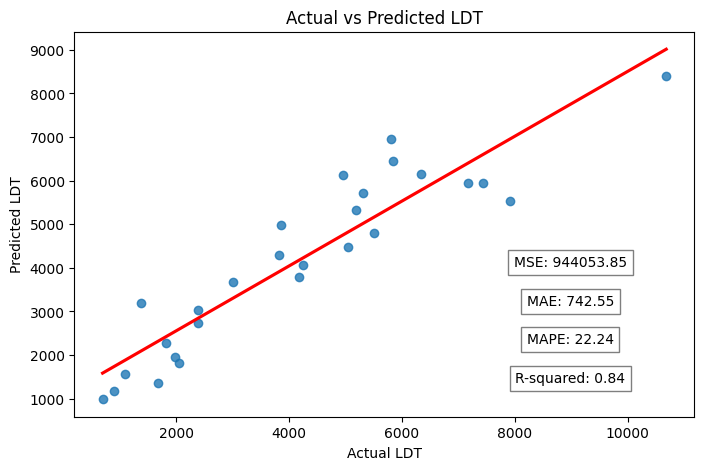

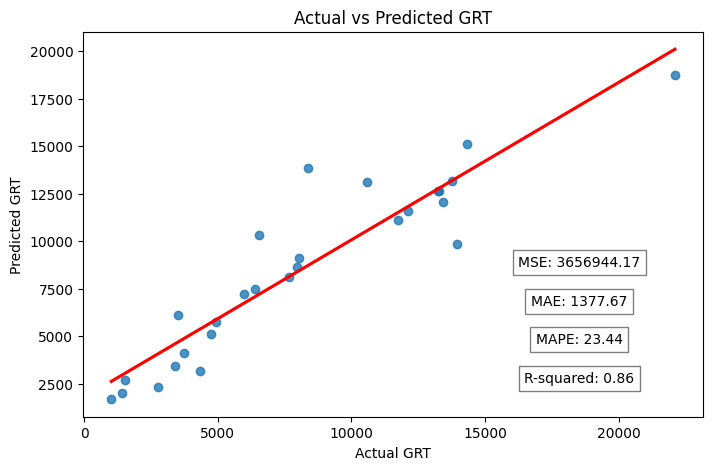

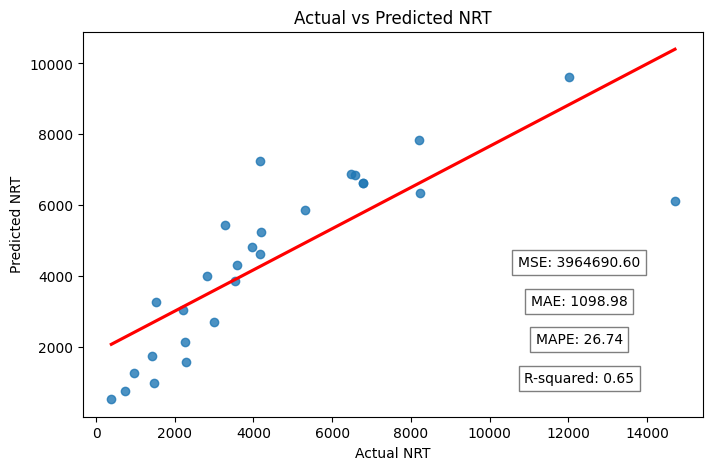

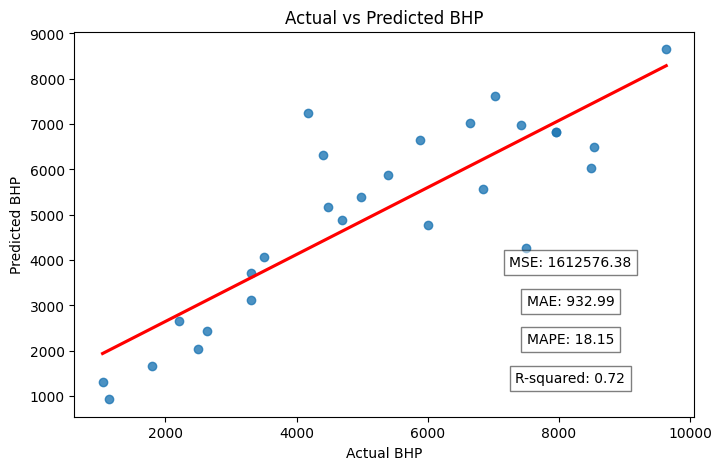

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
# Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 1659358.323566056
R-squared: 0.7336605915489333
Overall MAPE: 17.380720129058954%
Overall MAE: 639.7550845821988


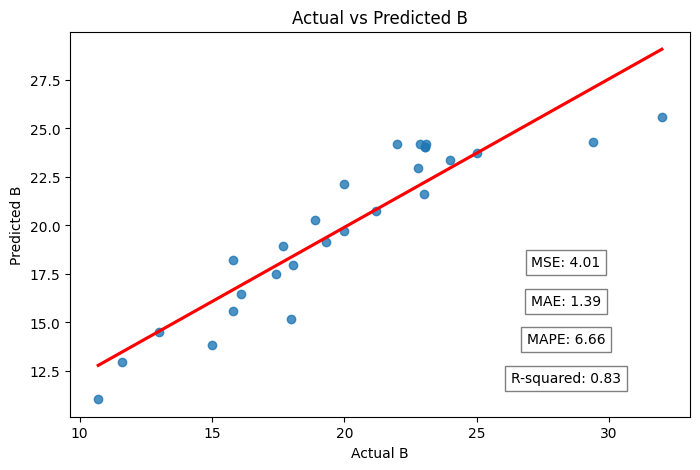

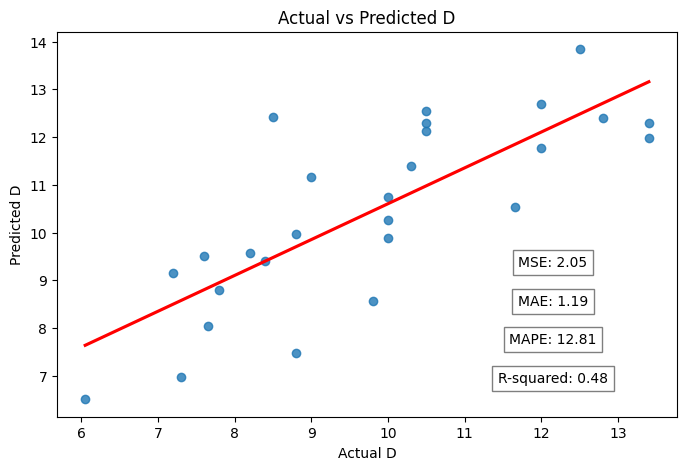

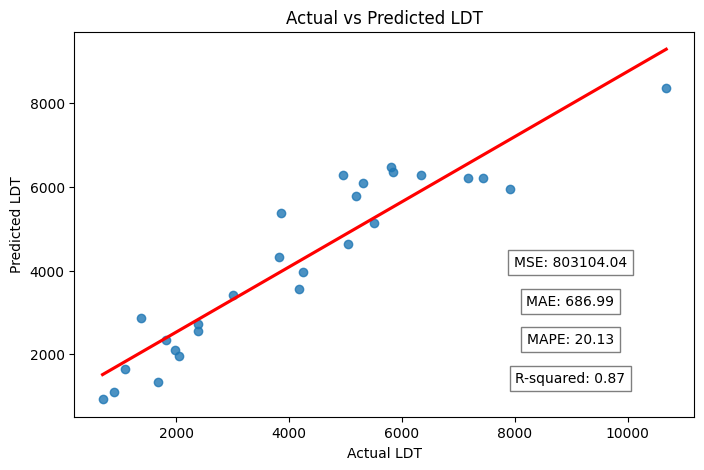

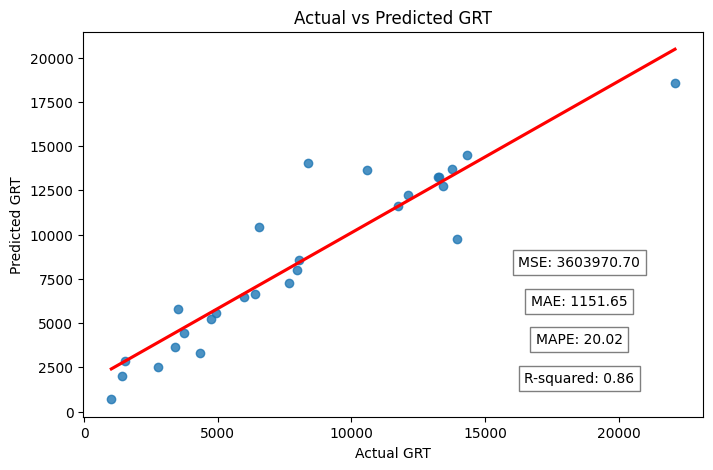

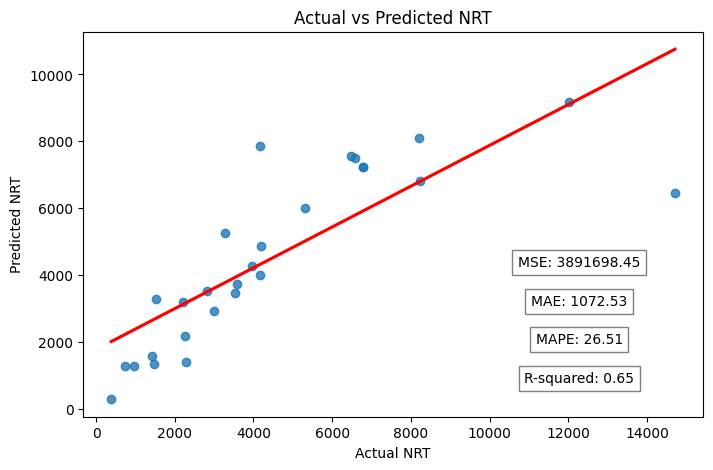

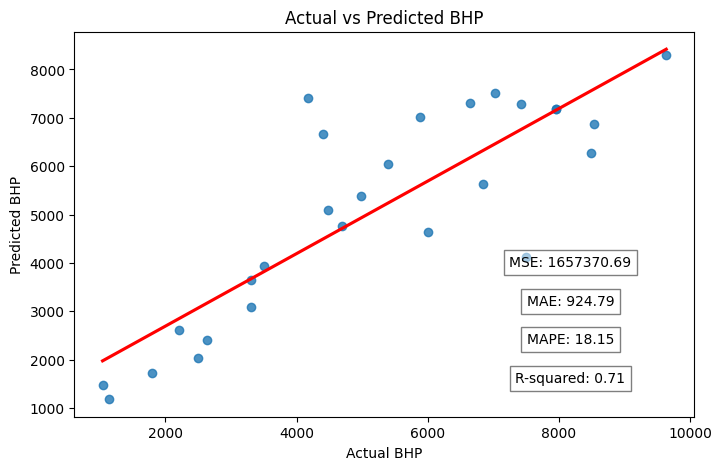

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting features and target
X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')

    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 2070008.6890872053
R-squared: 0.6424893290737606
Overall MAPE: 18.277168423639%
Overall MAE: 745.4177253086419


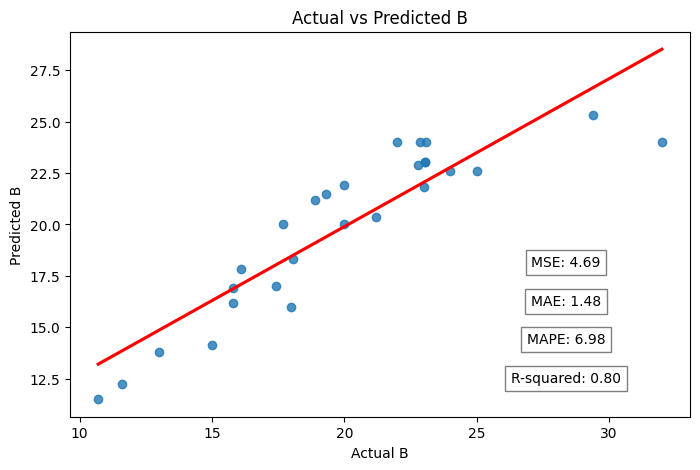

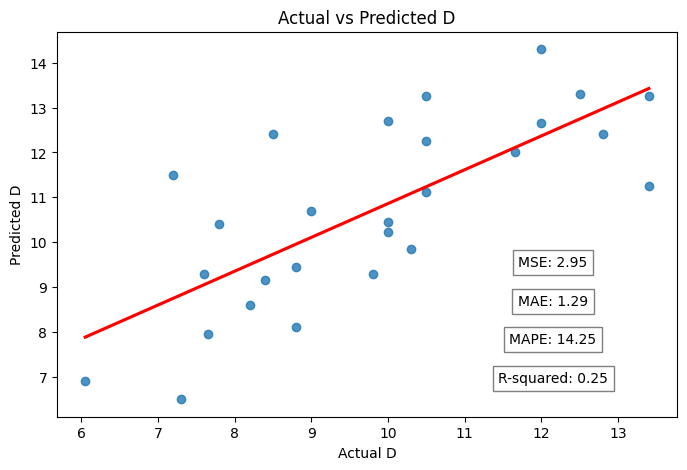

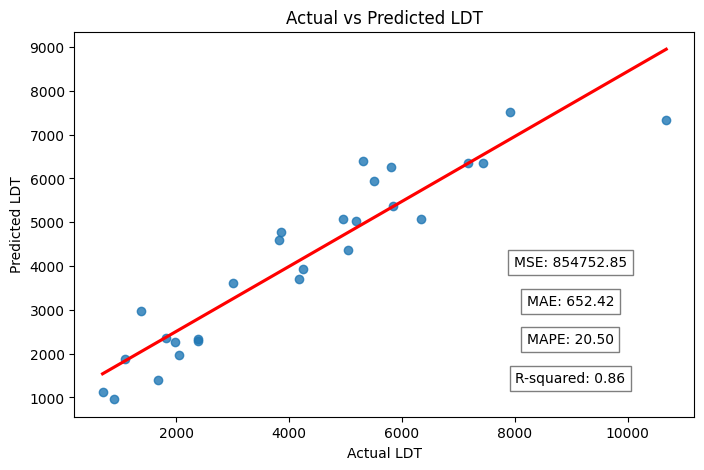

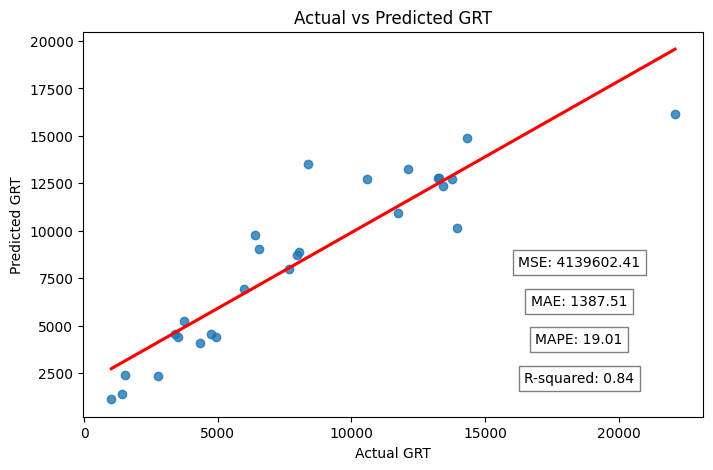

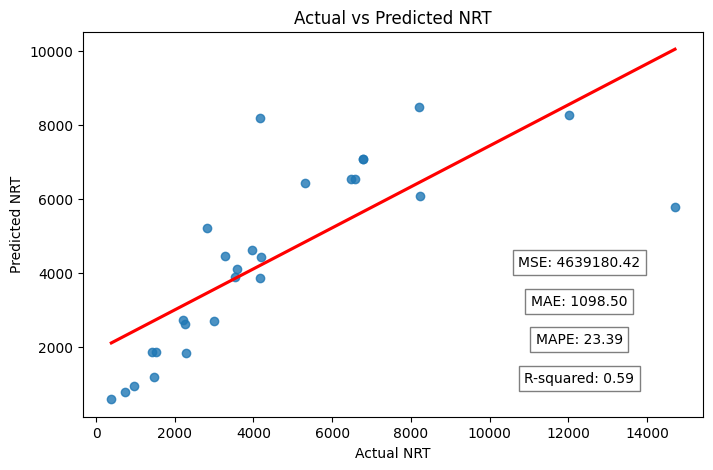

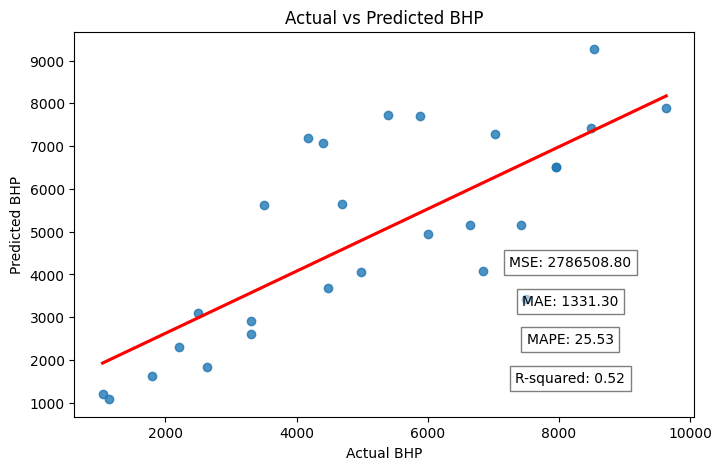

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor model
model = KNeighborsRegressor(n_neighbors=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 2506557.805535734
R-squared: 0.5279970846153691
Overall MAPE: 22.06486668154145%
Overall MAE: 811.6212530864199


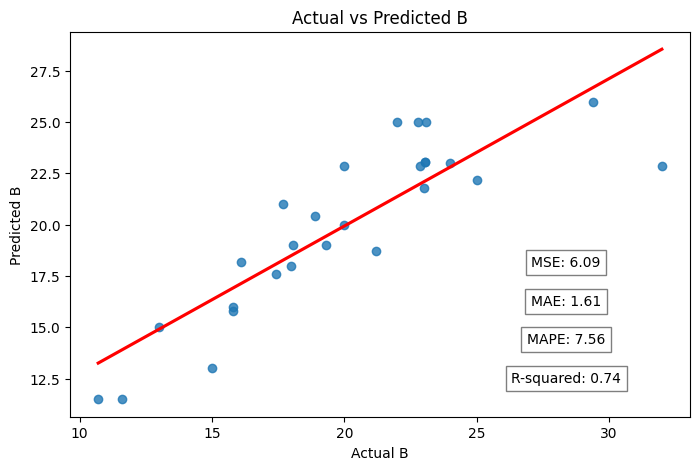

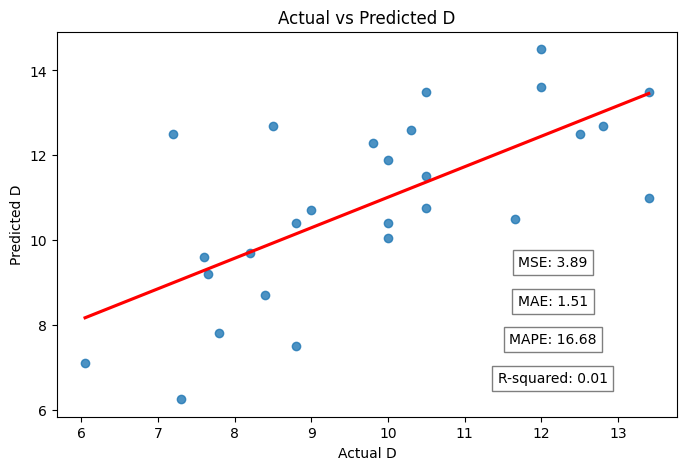

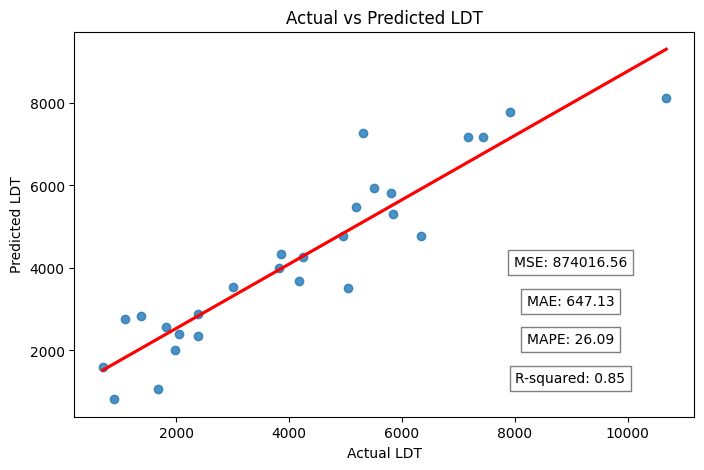

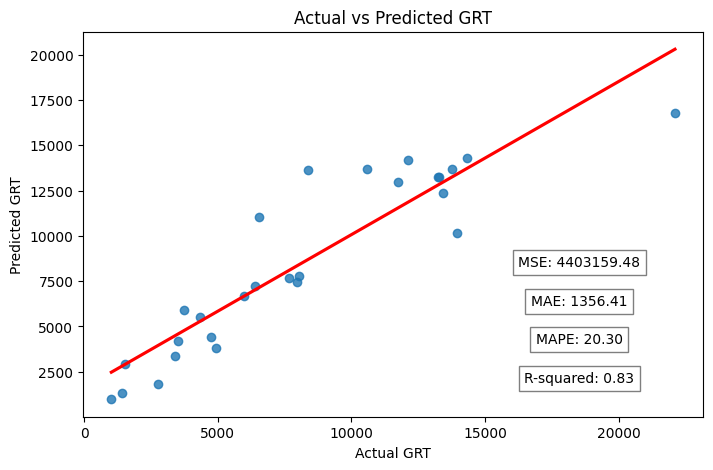

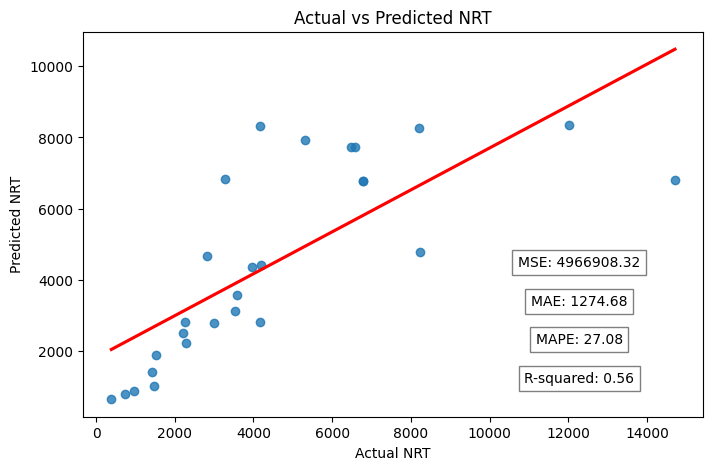

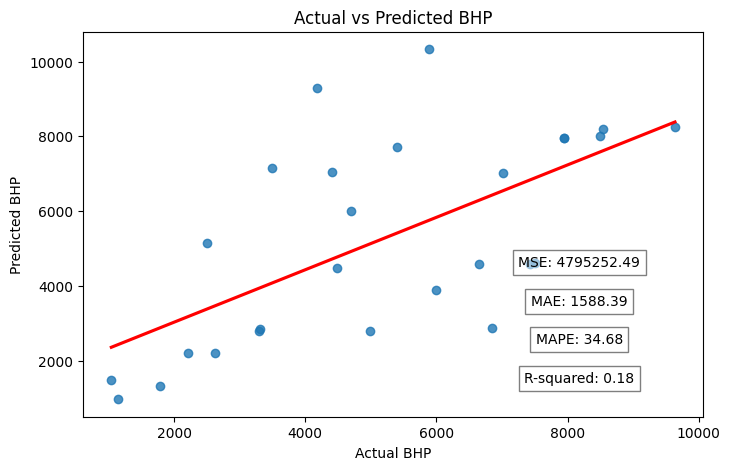

In [5]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 2036690.0584263478
R-squared: 0.6384326561691303
Overall MAPE: 19.532208022370497%
Overall MAE: 749.3434088741918


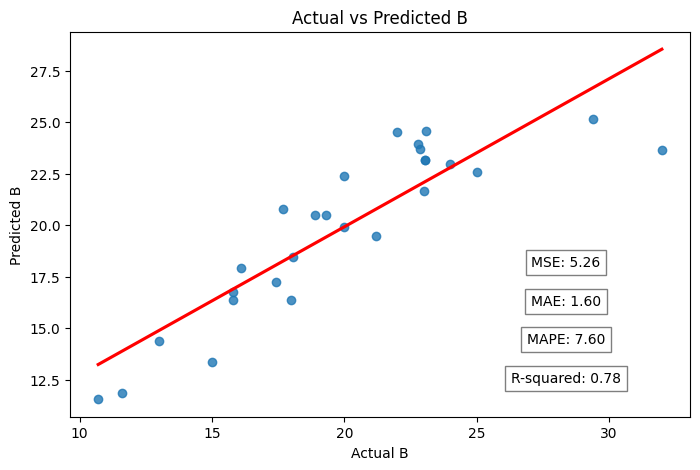

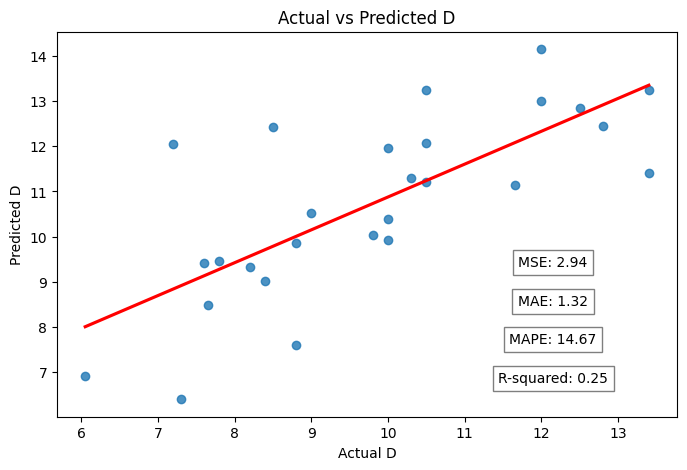

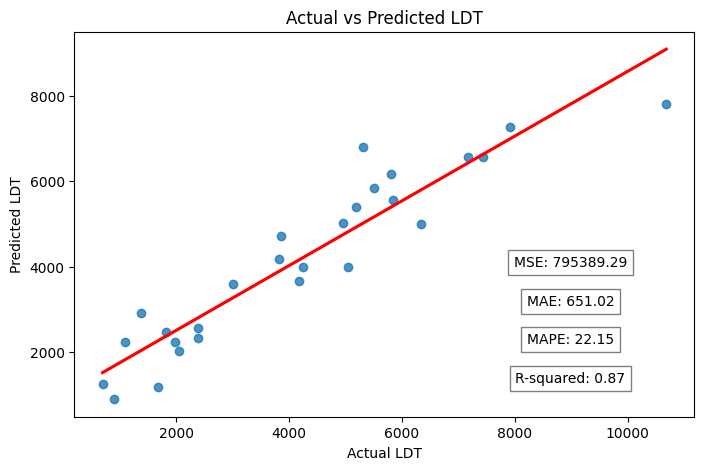

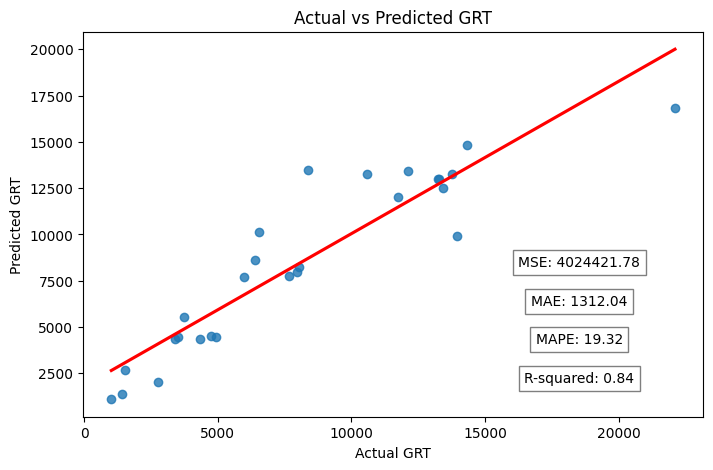

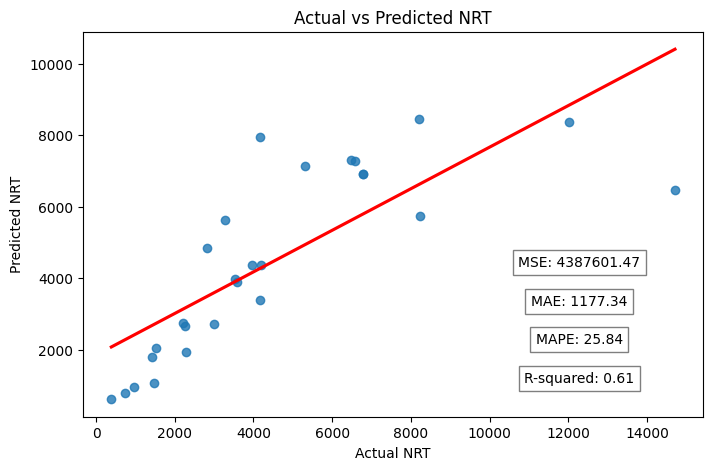

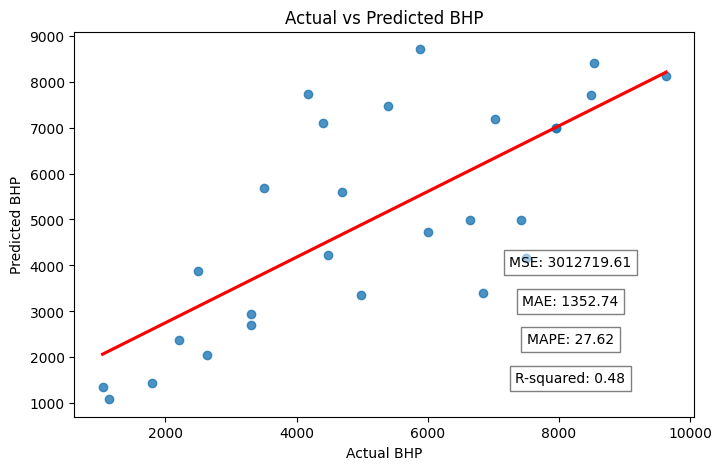

In [6]:
from sklearn.ensemble import RandomForestRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 1696390.6322893708
R-squared: 0.7301812884564521
Overall MAPE: 18.49876556451095%
Overall MAE: 692.481598216303


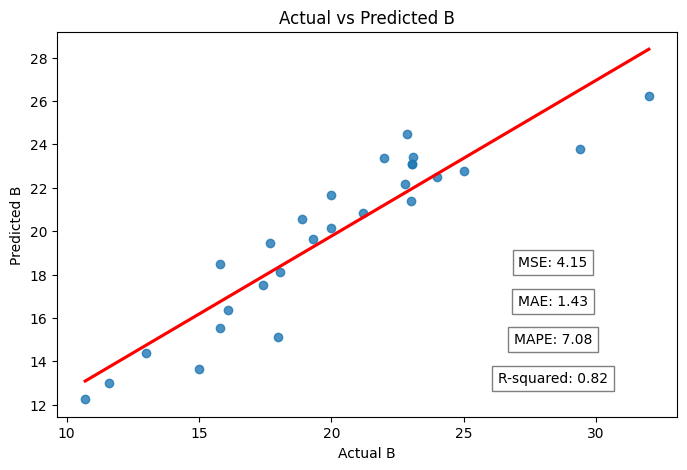

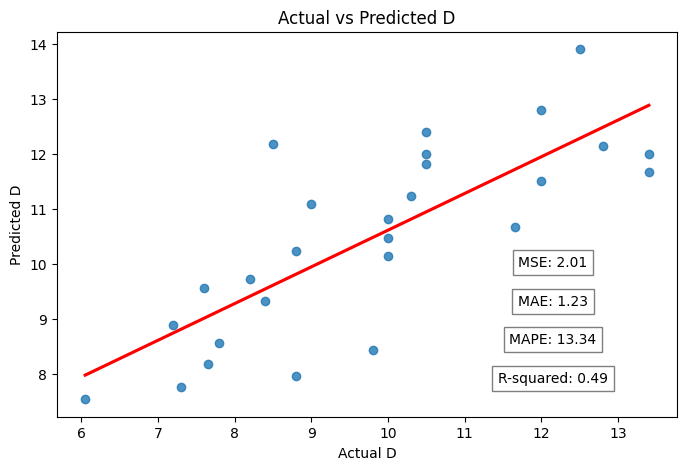

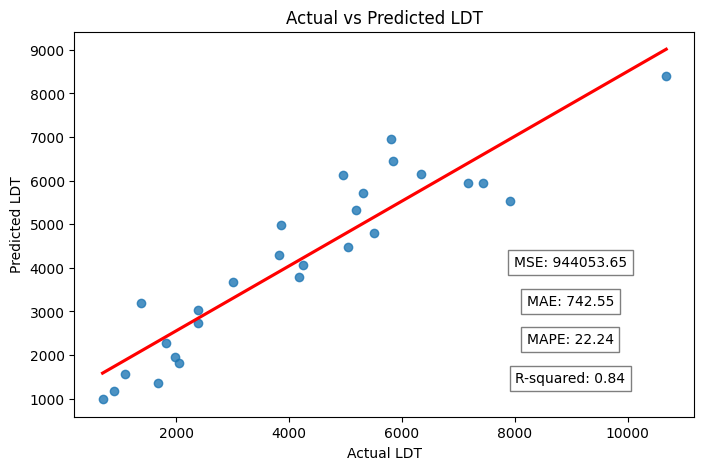

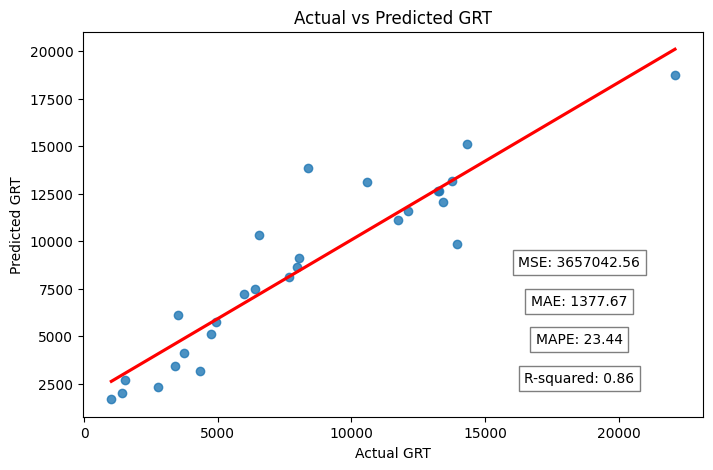

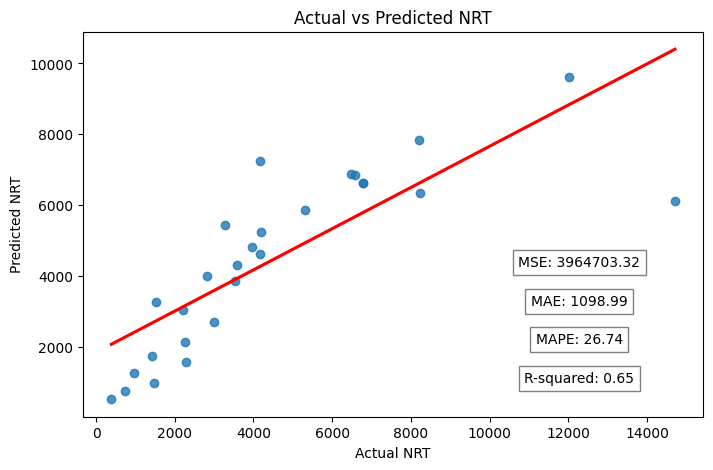

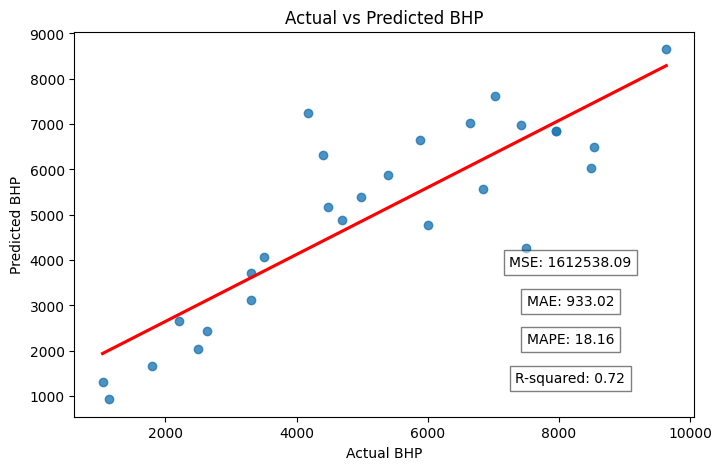

In [7]:
from sklearn.linear_model import Lasso

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regressor model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 1696382.130461637
R-squared: 0.7257182172949349
Overall MAPE: 18.508124801365373%
Overall MAE: 692.4746371514381


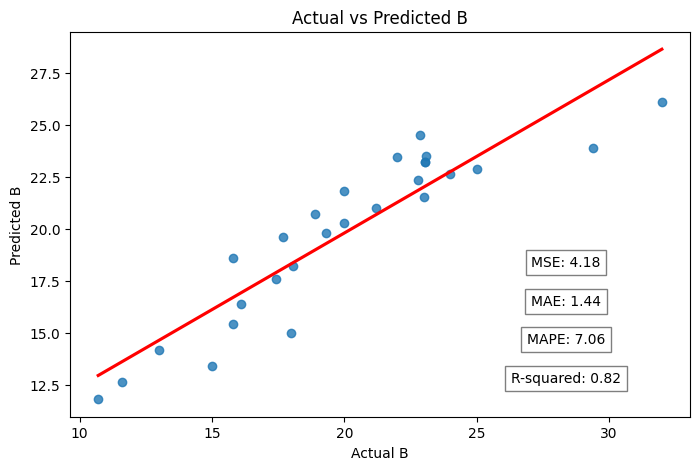

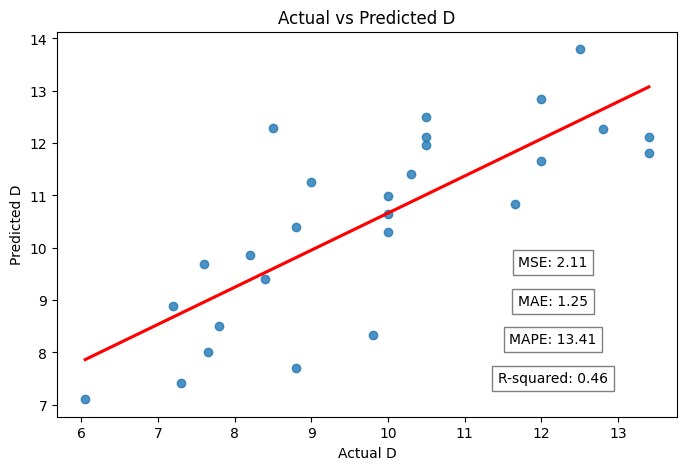

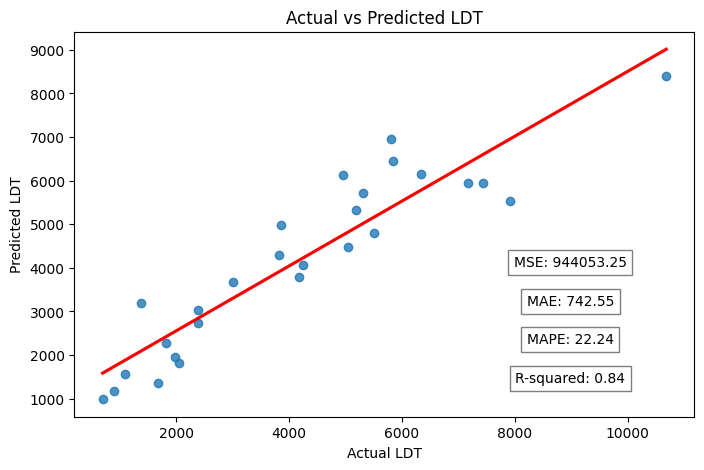

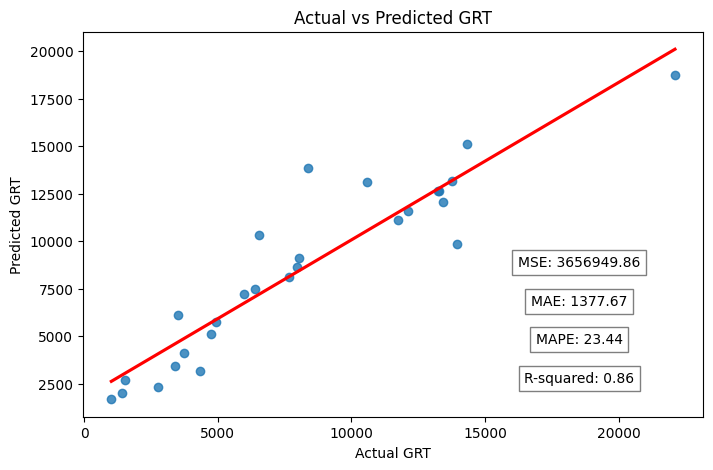

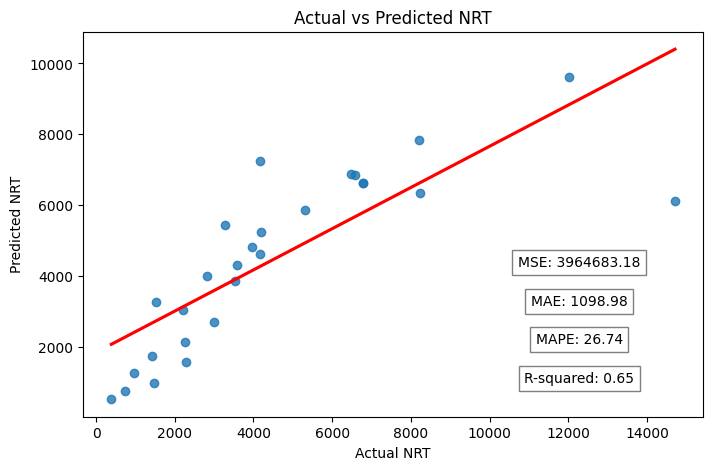

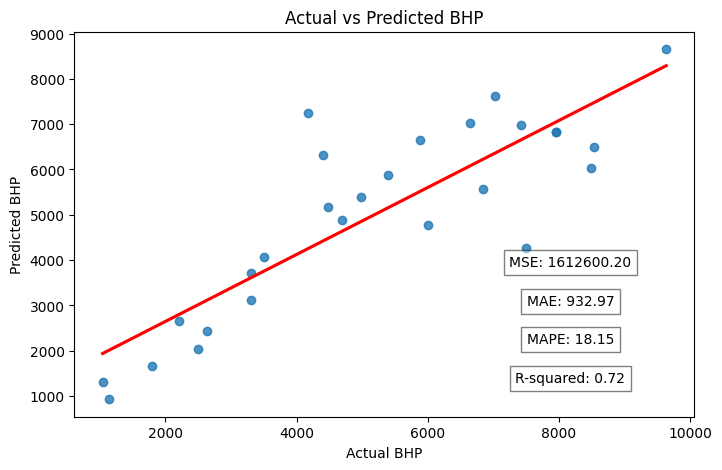

In [8]:
from sklearn.linear_model import Ridge

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regressor model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [9]:
from sklearn.svm import SVR

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressor model
model = SVR()

# Initialize lists to store predictions and true values for each column
y_pred_list = []
y_true_list = []

# Train and predict for each column separately
for col in y.columns:
    # Train the model
    model.fit(X_train, y_train[col])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Append predictions and true values to the lists
    y_pred_list.append(y_pred)
    y_true_list.append(y_test[col])

# Convert lists to arrays
y_pred_array = np.array(y_pred_list).T
y_true_array = np.array(y_true_list).T

# Evaluate the model
mse = mean_squared_error(y_true_array, y_pred_array)
r2 = r2_score(y_true_array, y_pred_array)
mape = np.mean(np.abs((y_true_array - y_pred_array) / y_true_array)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_true_array, y_pred_array)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

Mean Squared Error: 10148538.029950107
R-squared: 0.051497643035929075
Overall MAPE: 50.05669304878062%
Overall MAE: 1895.8794030394793


In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize the AdaBoost regressor model
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 6.265264941800367
R-squared (B): 0.7336342224723661
MAPE (B): 10.297879125766507%
MAE (B): 1.9307047029608373
--------------------------------------------------
Mean Squared Error (D): 2.1504925395572254
R-squared (D): 0.4549961372158563
MAPE (D): 12.92846420180849%
MAE (D): 1.1700294982190411
--------------------------------------------------
Mean Squared Error (LDT): 1023014.7697523566
R-squared (LDT): 0.8280806778578513
MAPE (LDT): 24.174895734122583%
MAE (LDT): 771.1364365066316
--------------------------------------------------
Mean Squared Error (GRT): 4205855.389043317
R-squared (GRT): 0.8359896294094246
MAPE (GRT): 28.4661176614603%
MAE (GRT): 1363.8084036819555
--------------------------------------------------
Mean Squared Error (NRT): 4578494.43760443
R-squared (NRT): 0.5916428211738959
MAPE (NRT): 33.756838806983154%
MAE (NRT): 1190.8526444190807
--------------------------------------------------
Mean Squared Error (BHP): 1972073.6240351105
R-squared

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regressor model
model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 4.372074868291574
R-squared (B): 0.8141226057446079
MAPE (B): 7.139477355620693%
MAE (B): 1.4682074393533313
--------------------------------------------------
Mean Squared Error (D): 2.611526716957794
R-squared (D): 0.33815527265254375
MAPE (D): 13.913780131717315%
MAE (D): 1.2595382358918972
--------------------------------------------------
Mean Squared Error (LDT): 859840.9700392684
R-squared (LDT): 0.8555023044730992
MAPE (LDT): 23.633945709833604%
MAE (LDT): 698.0806677972977
--------------------------------------------------
Mean Squared Error (GRT): 3952405.89932474
R-squared (GRT): 0.8458730754363672
MAPE (GRT): 20.706286976827315%
MAE (GRT): 1307.0175656050478
--------------------------------------------------
Mean Squared Error (NRT): 4153518.0916500567
R-squared (NRT): 0.6295465784169767
MAPE (NRT): 29.06686682648214%
MAE (NRT): 1170.0585160142002
--------------------------------------------------
Mean Squared Error (BHP): 2683363.061053749
R-squared

In [12]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 5.870082557698519
R-squared (B): 0.7504352778122964
MAPE (B): 8.217382992047572%
MAE (B): 1.6909711074829101
--------------------------------------------------
Mean Squared Error (D): 3.498346808160803
R-squared (D): 0.1134065853589159
MAPE (D): 15.283363667536989%
MAE (D): 1.3929275300767687
--------------------------------------------------
Mean Squared Error (LDT): 1036318.9469245559
R-squared (LDT): 0.825844888904719
MAPE (LDT): 20.406643628863684%
MAE (LDT): 709.2823236762152
--------------------------------------------------
Mean Squared Error (GRT): 3779566.2793006785
R-squared (GRT): 0.8526130813354594
MAPE (GRT): 18.710692126205476%
MAE (GRT): 1240.650661892361
--------------------------------------------------
Mean Squared Error (NRT): 4380776.405113959
R-squared (NRT): 0.6092773469008947
MAPE (NRT): 25.722953141141026%
MAE (NRT): 1142.648410373264
--------------------------------------------------
Mean Squared Error (BHP): 3613656.988409394
R-squared 

Epoch 1/900
3/3 [==============================] - 2s 166ms/step - loss: 30745978.0000 - mae: 3535.7380 - val_loss: 24437256.0000 - val_mae: 3132.7834
Epoch 2/900
3/3 [==============================] - 0s 26ms/step - loss: 30745750.0000 - mae: 3535.7183 - val_loss: 24437066.0000 - val_mae: 3132.7656
Epoch 3/900
3/3 [==============================] - 0s 35ms/step - loss: 30745514.0000 - mae: 3535.6990 - val_loss: 24436874.0000 - val_mae: 3132.7478
Epoch 4/900
3/3 [==============================] - 0s 35ms/step - loss: 30745304.0000 - mae: 3535.6802 - val_loss: 24436676.0000 - val_mae: 3132.7285
Epoch 5/900
3/3 [==============================] - 0s 35ms/step - loss: 30745060.0000 - mae: 3535.6589 - val_loss: 24436470.0000 - val_mae: 3132.7080
Epoch 6/900
3/3 [==============================] - 0s 25ms/step - loss: 30744820.0000 - mae: 3535.6365 - val_loss: 24436248.0000 - val_mae: 3132.6860
Epoch 7/900
3/3 [==============================] - 0s 36ms/step - loss: 30744548.0000 - mae: 3535.6

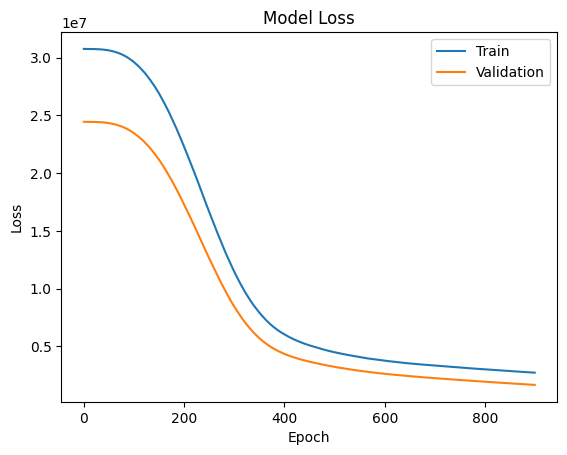

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))  # Two input features (LOA, DWT)
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Six output targets (B, D, LDT, NRT, GRT, BHP)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=900, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()